Import Libraries and Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
import os

# Download, and Unzip Dataset

[Dataset Link](https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data)

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jaganadhg/house-hold-energy-data

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 160MB/s]


In [3]:
data_path= 'house-hold-energy-data'
!unzip 'house-hold-energy-data.zip' -d {data_path}

Archive:  house-hold-energy-data.zip
  inflating: house-hold-energy-data/D202.csv  
  inflating: house-hold-energy-data/D202.xlsx  


In [4]:
os.listdir(data_path)

['D202.csv', 'D202.xlsx']

#**Load & Explore the Data**

In [5]:
df= pd.read_csv(os.path.join(data_path, 'D202.csv'))
df

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,10/24/2018,22:45,22:59,0.02,kWh,$0.00,NaN
70364,Electric usage,10/24/2018,23:00,23:14,0.03,kWh,$0.01,NaN
70365,Electric usage,10/24/2018,23:15,23:29,0.03,kWh,$0.01,NaN
70366,Electric usage,10/24/2018,23:30,23:44,0.03,kWh,$0.01,NaN


In [6]:
df['USAGE'].describe()

count    70368.000000
mean         0.121941
std          0.210507
min          0.000000
25%          0.030000
50%          0.050000
75%          0.120000
max          2.360000
Name: USAGE, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


## Visualization

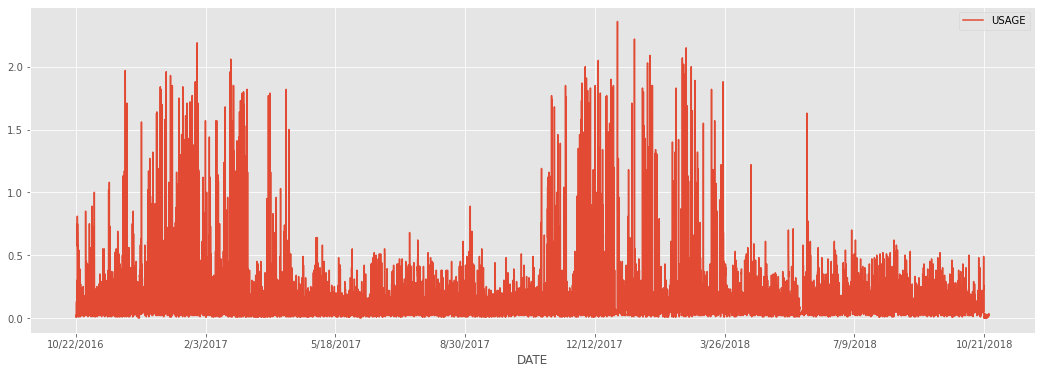

In [8]:
plt.style.use('ggplot')

df.plot(kind='line', x='DATE', y='USAGE', figsize=(18, 6 ))

#**Preprocessing**

Membuat dataframe baru untuk menampung `df` yang di-praproses

In [9]:
preprocessed_df= df.copy()

preprocessed_df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


Untuk kenyamanan nama kolom diubah dari kapital menjadi huruf kecil, dan spasi menjadi underline '_'

In [10]:
preprocessed_df.columns= ['_'.join(i.split(' ')).lower() for i in preprocessed_df.columns]

preprocessed_df.columns

Index(['type', 'date', 'start_time', 'end_time', 'usage', 'units', 'cost',
       'notes'],
      dtype='object')

## Feature Selection

In [11]:
preprocessed_df= preprocessed_df.drop(['type', 'end_time','units', 'cost', 'notes'], axis=1)
preprocessed_df

,date,start_time,usage
0,10/22/2016,0:00,0.01
1,10/22/2016,0:15,0.01
2,10/22/2016,0:30,0.01
3,10/22/2016,0:45,0.01
4,10/22/2016,1:00,0.01
...,...,...,...
70363,10/24/2018,22:45,0.02
70364,10/24/2018,23:00,0.03
70365,10/24/2018,23:15,0.03
70366,10/24/2018,23:30,0.03


## Handling Null Value

In [12]:
preprocessed_df.isna().any()

date          False
start_time    False
usage         False
dtype: bool

## Feature Engineering

In [13]:
preprocessed_df['date']= pd.to_datetime(preprocessed_df['date'])
preprocessed_df['start_time'] = pd.to_datetime(preprocessed_df['start_time'])

In [14]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        70368 non-null  datetime64[ns]
 1   start_time  70368 non-null  datetime64[ns]
 2   usage       70368 non-null  float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 1.6 MB


In [15]:
preprocessed_df['day'] = preprocessed_df['date'].dt.dayofyear
preprocessed_df['month'] = preprocessed_df['date'].dt.month

preprocessed_df['hour'] = preprocessed_df['start_time'].dt.hour
preprocessed_df['minute'] = preprocessed_df['start_time'].dt.minute

preprocessed_df

,date,start_time,usage,day,month,hour,minute
0,2016-10-22,2022-09-10 00:00:00,0.01,296,10,0,0
1,2016-10-22,2022-09-10 00:15:00,0.01,296,10,0,15
2,2016-10-22,2022-09-10 00:30:00,0.01,296,10,0,30
3,2016-10-22,2022-09-10 00:45:00,0.01,296,10,0,45
4,2016-10-22,2022-09-10 01:00:00,0.01,296,10,1,0
...,...,...,...,...,...,...,...
70363,2018-10-24,2022-09-10 22:45:00,0.02,297,10,22,45
70364,2018-10-24,2022-09-10 23:00:00,0.03,297,10,23,0
70365,2018-10-24,2022-09-10 23:15:00,0.03,297,10,23,15
70366,2018-10-24,2022-09-10 23:30:00,0.03,297,10,23,30


Memindahkan kolom usage ke sebelah kanan

In [16]:
usage= preprocessed_df['usage']
preprocessed_df= preprocessed_df.drop('usage', axis=1)

preprocessed_df['usage']= usage

preprocessed_df.head()

,date,start_time,day,month,hour,minute,usage
0,2016-10-22,2022-09-10 00:00:00,296,10,0,0,0.01
1,2016-10-22,2022-09-10 00:15:00,296,10,0,15,0.01
2,2016-10-22,2022-09-10 00:30:00,296,10,0,30,0.01
3,2016-10-22,2022-09-10 00:45:00,296,10,0,45,0.01
4,2016-10-22,2022-09-10 01:00:00,296,10,1,0,0.01


## Train Val Split

In [17]:
train_scale= 0.8
split_days= int(len(preprocessed_df['date'].unique())*train_scale)
split_date= preprocessed_df['date'].min()+datetime.timedelta(days=split_days)

split_days, split_date

(586, Timestamp('2018-05-31 00:00:00'))

In [18]:
train_df= preprocessed_df[preprocessed_df['date']<split_date]
val_df= preprocessed_df[preprocessed_df['date']>=split_date]

len(train_df), len(val_df)

(56256, 14112)

In [19]:
train_df= train_df.drop(['date', 'start_time'], axis=1)
val_df= val_df.drop(['date', 'start_time'], axis=1)

train_df.head()

,day,month,hour,minute,usage
0,296,10,0,0,0.01
1,296,10,0,15,0.01
2,296,10,0,30,0.01
3,296,10,0,45,0.01
4,296,10,1,0,0.01


## Normalization

In [20]:
scaler = MinMaxScaler()

scaler.fit(train_df)

train_df = scaler.transform(train_df)
val_df = scaler.transform(val_df)

train_df[:5]

array([[0.80821918, 0.81818182, 0.        , 0.        , 0.00423729],
       [0.80821918, 0.81818182, 0.        , 0.33333333, 0.00423729],
       [0.80821918, 0.81818182, 0.        , 0.66666667, 0.00423729],
       [0.80821918, 0.81818182, 0.        , 1.        , 0.00423729],
       [0.80821918, 0.81818182, 0.04347826, 0.        , 0.00423729]])

## Sliding Window the Data

In [21]:
sliding_window_len= int(24*(60/15))

sliding_window_len

96

In [22]:
def windowed_dataset(series, window_size=96, batch_size=64, sliding_len=None):
    if sliding_len is None: sliding_len= len(series)

    x= []
    y= []

    for i in range(window_size, sliding_len):
        x.append(series[i-window_size:i])
        y.append(series[i, -1])

    return x, y

In [23]:
x_train, y_train= windowed_dataset(train_df, sliding_window_len, 64)

past_days = scaler.transform(train_df[sliding_window_len:])
val_df = np.append(past_days, val_df, axis=0)

x_val, y_val= windowed_dataset(val_df, sliding_window_len, 64, len(val_df)-sliding_window_len)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
x_train= np.array(x_train)
y_train= np.array(y_train)

x_val= np.array(x_val)
y_val= np.array(y_val)

#**Training**

In [25]:
model= keras.Sequential([
    keras.layers.Input([96, 5]),
    keras.layers.LSTM(256, 'tanh', return_sequences= True),
    keras.layers.Dropout(0.25),
    keras.layers.LSTM(128, 'tanh', return_sequences= True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(128, 'tanh'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])


optimizer= keras.optimizers.Adam(learning_rate=1e-03)
loss=tf.keras.losses.Huber()

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=["mae"])

In [26]:
descrease_lr= keras.callbacks.ReduceLROnPlateau(monitor='mae', factor= 0.75, patience=1, min_lr=5e-6, min_delta=1e-3)
model_checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath='weight_checkpoints/weight-epoch:{epoch:0.1f}-mae{mae:0.5f}.ckpt', monitor= 'mae', save_freq='epoch', save_weights_only=True)

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val), callbacks=[descrease_lr, model_checkpoint])

Epoch 1/20
878/878 [==============================] - 40s 33ms/step - loss: 0.0022 - mae: 0.0317 - val_loss: 4.8597e-04 - val_mae: 0.0208 - lr: 0.0010
Epoch 2/20
878/878 [==============================] - 28s 32ms/step - loss: 0.0012 - mae: 0.0212 - val_loss: 5.3696e-04 - val_mae: 0.0253 - lr: 0.0010
Epoch 3/20
878/878 [==============================] - 29s 33ms/step - loss: 0.0011 - mae: 0.0193 - val_loss: 3.7982e-04 - val_mae: 0.0186 - lr: 0.0010
Epoch 4/20
878/878 [==============================] - 29s 32ms/step - loss: 0.0010 - mae: 0.0183 - val_loss: 3.4376e-04 - val_mae: 0.0173 - lr: 0.0010
Epoch 5/20
878/878 [==============================] - 28s 32ms/step - loss: 0.0010 - mae: 0.0173 - val_loss: 2.5161e-04 - val_mae: 0.0088 - lr: 7.5000e-04
Epoch 6/20
878/878 [==============================] - 28s 32ms/step - loss: 0.0010 - mae: 0.0169 - val_loss: 2.6418e-04 - val_mae: 0.0114 - lr: 7.5000e-04
Epoch 7/20
878/878 [==============================] - 28s 32ms/step - loss: 9.8772e-04

In [27]:
model.load_weights('weight_checkpoints/weight-epoch:17.0-mae0.01439.ckpt')

#**Visualization of Loss and Accuracy During Training and Validation**

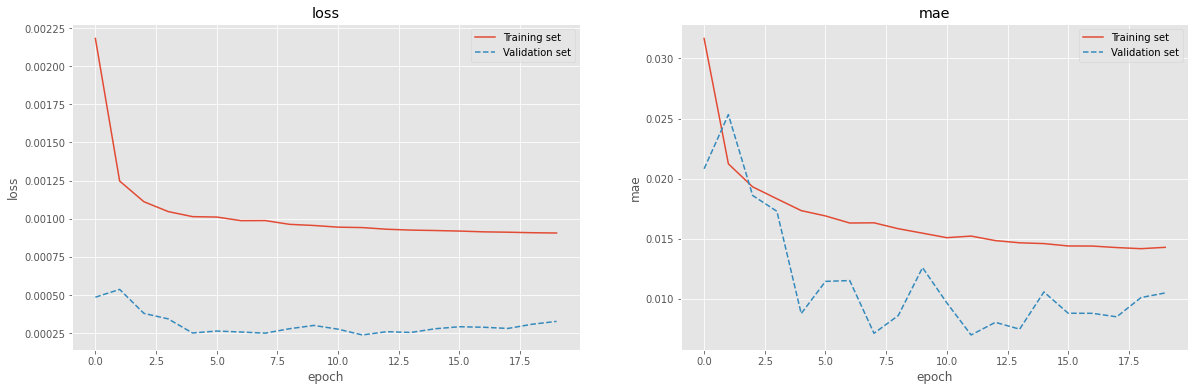

In [28]:
plt.figure(figsize=(20, 6))

for idx, i in enumerate(['loss', 'mae']):
    plt.subplot(1, 2, idx+1)
    plt.title(i)
    plt.xlabel('epoch')
    plt.ylabel(i)
    plt.plot(history.history[i], label='Training set')
    plt.plot(history.history[f'val_{i}'], label='Validation set', linestyle='--')
    plt.legend()

plt.show()

#**Forecast the Validation Set**

In [29]:
y_pred= model.predict(x_val)

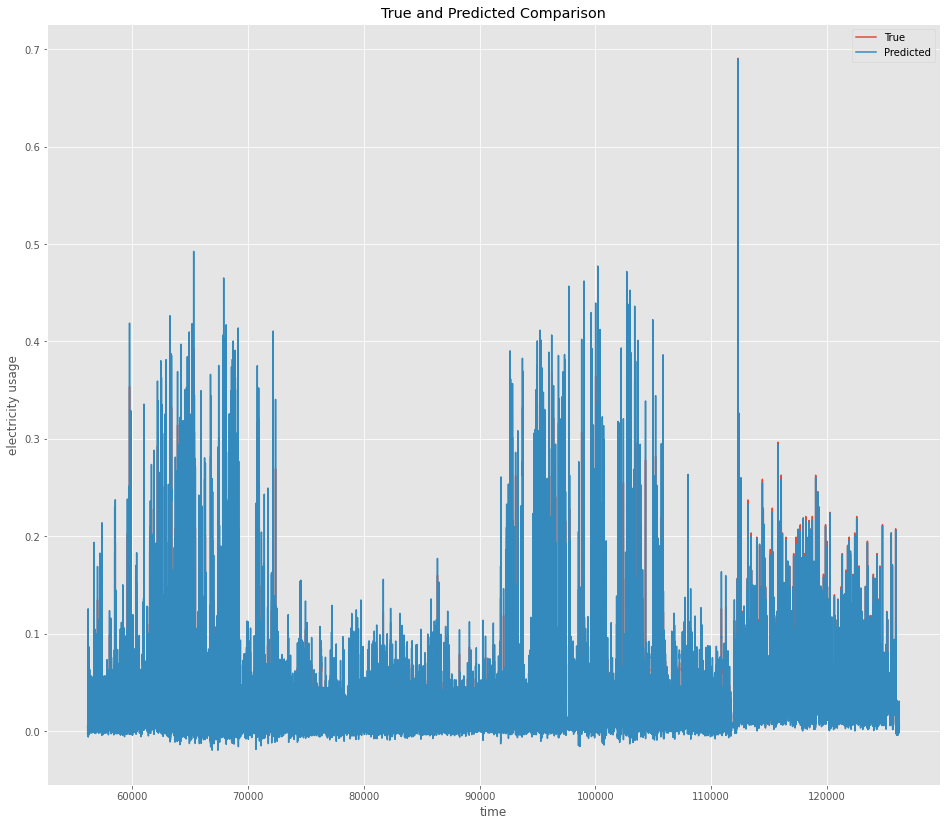

In [34]:
fig = plt.figure(figsize=(16,14))

plt.plot(np.arange(len(y_train), len(y_train)+len(y_val)), y_val, label = 'True')
plt.plot(np.arange(len(y_train), len(y_train)+len(y_val)), y_pred, label = 'Predicted')

plt.title('True and Predicted Comparison')

plt.xlabel('time')
plt.ylabel('electricity usage')
plt.legend()

plt.show()